Prompt Text:

0


Binary Tree:

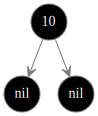

i
8
i
12
i
93
i
9
i
10
i
1
i
8
d
8
third deletion node option
transplanting
left
12
forth deletion node option
transplanting
changing root
self.val = 9
fixing up
d
8
first deletion node option
transplanting
right
d
9
third deletion node option
transplanting
left
12
forth deletion node option
transplanting
changing root
self.val = 10
fixing up
d
0
first deletion node option
transplanting
left
1
d
93
first deletion node option
transplanting
right
fixing up
d
1
first deletion node option
transplanting
left
10
fixing up
d
12
first deletion node option
transplanting
right
d
10


In [ ]:
import algviz
import sys

class rb_node(algviz.BinaryTreeNode):
    def __init__(self, value = None, left = None, right = None, color=None, parent=None):
        super().__init__(value, left, right)
        self.parent = parent
        self.color = color
        
    def rb_insert(self, rb_tree, new_node):
            # root.right.val = 1
            # root.right.right = algviz.BinaryTreeNode('nil')
            # root.right.left = algviz.BinaryTreeNode('nil')
        parent_node = None
        search_node = self
        while 1:
            parent_node = search_node
            rb_tree.markNode(algviz.color_light_blue, search_node, hold=False)
            viz.display()
            if new_node.val <= search_node.val:
                if str(search_node.left.val) == nil_node_val:
                    rb_tree.markNode(algviz.color_light_blue, search_node.left, hold=False)
                    viz.display(delay=0.5)
                    new_node.parent = parent_node
                    prev_left = search_node.left
                    prev_left.parent = None
                    search_node.left = new_node
                    rb_tree.removeNode(prev_left)
                    rb_tree.markNode(algviz.color_black, new_node, hold=True)
                    rb_tree.markNode(algviz.color_black, new_node.right, hold=True)
                    rb_tree.markNode(algviz.color_black, new_node.left, hold=True)
                    viz.display(delay=0.5)
                    break
                search_node = search_node.left
            else:
                if str(search_node.right.val) == nil_node_val:
                    rb_tree.markNode(algviz.color_light_blue, search_node.right, hold=False)
                    viz.display()
                    new_node.parent = parent_node
                    # print(f'parent_node.val = {parent_node.val}')
                    prev_right = search_node.right
                    prev_right.parent = None
                    search_node.right = new_node
                    rb_tree.removeNode(prev_right)
                    rb_tree.markNode(algviz.color_black, new_node, hold=True)
                    rb_tree.markNode(algviz.color_black, new_node.right, hold=True)
                    rb_tree.markNode(algviz.color_black, new_node.left, hold=True)
                    break
                search_node = search_node.right
        if parent_node == nil_node:
            self = new_node
        elif new_node.val < parent_node.val:
            parent_node.left = new_node
        else:
            parent_node.right = new_node
        new_node.color = algviz.color_red
        rb_tree.markNode(new_node.color, new_node, hold= True)
        viz.display(delay=0.5)
        new_root = self.rb_insert_fixup(rb_tree, new_node)
        if new_root.val != self.val:
            self = new_root
        return self

    def rb_insert_fixup(self, rb_tree, new_node):
        new_root = self
        while new_node.parent.color == algviz.color_red:
            if new_node.parent == new_node.parent.parent.left:
                # print('Went to left in the first condition')
                uncle_node = new_node.parent.parent.right
                if uncle_node.color == algviz.color_red:
                    new_node.parent.color = algviz.color_black
                    rb_tree.markNode(new_node.parent.color, new_node.parent, hold=True)
                    uncle_node.color = algviz.color_black
                    new_node.parent.parent.color = algviz.color_red
                    # print(f'new_node.parent.val = {new_node.val}')
                    rb_tree.markNode(uncle_node.color, uncle_node, hold=True)
                    rb_tree.markNode(new_node.parent.parent.color, new_node.parent.parent, hold=True)
                    new_node = new_node.parent.parent
                    viz.display(delay=0.5)
                elif new_node == new_node.parent.right:
                    new_node = new_node.parent
                    new_root = self.left_rotation(new_node)
                else:
                    new_node.parent.color = algviz.color_black
                    new_node.parent.parent.color = algviz.color_red
                    rb_tree.markNode(new_node.parent.color, new_node.parent, hold=True)
                    rb_tree.markNode(new_node.parent.parent.color, new_node.parent.parent, hold=True)
                    new_root = self.right_rotation(new_node.parent.parent)
            else:
                # print('Went to right in the first condition')
                uncle_node = new_node.parent.parent.left #if new_node.parent.parent.left != nil_node else 
                if uncle_node.color == algviz.color_red:
                    new_node.parent.color = algviz.color_black
                    rb_tree.markNode(new_node.parent.color, new_node.parent, hold=True)
                    uncle_node.color = algviz.color_black
                    new_node.parent.parent.color = algviz.color_red
                    rb_tree.markNode(uncle_node.color, uncle_node, hold=True)
                    rb_tree.markNode(new_node.parent.parent.color, new_node.parent.parent, hold=True)
                    new_node = new_node.parent.parent
                    viz.display(delay=0.5)
                elif new_node == new_node.parent.left:
                    new_node = new_node.parent
                    new_root = self.right_rotation(new_node)
                else:
                    new_node.parent.color = algviz.color_black
                    new_node.parent.parent.color = algviz.color_red
                    rb_tree.markNode(new_node.parent.color, new_node.parent, hold=True)
                    rb_tree.markNode(new_node.parent.parent.color, new_node.parent.parent, hold=True)
                    new_root = self.left_rotation(new_node.parent.parent)
            if new_root.val != self.val:
                self = new_root
        self.color = algviz.color_black
        rb_tree.markNode(self.color, self, hold=True)
        return new_root if new_root != None else self
                
                    
    def left_rotation(self, pivot_node):
        # print('rotating left')
        pivot_successor = pivot_node.right
        pivot_node.right = pivot_successor.left if pivot_successor.left != None else nil_node

        if pivot_successor.left != nil_node:
            pivot_successor.left.parent = pivot_node
        pivot_successor.parent = pivot_node.parent
        if pivot_node.parent == nil_node:
            # print('root is changing')
            self = pivot_successor
            # print(f'self.val = {self.val}')
        elif pivot_node == pivot_node.parent.left:
            pivot_node.parent.left = pivot_successor
        else:
            pivot_node.parent.right = pivot_successor
        pivot_successor.left = pivot_node
        pivot_node.parent = pivot_successor
        viz.display(delay=0.5)
        return self

    def right_rotation(self, pivot_node):
        # print('rotating right')
        pivot_successor = pivot_node.left
        pivot_node.left = pivot_successor.right if pivot_successor.right != None else nil_node

        if pivot_successor.right != nil_node:
            pivot_successor.right.parent = pivot_node
        pivot_successor.parent = pivot_node.parent
        if pivot_node.parent == nil_node:
            # print('root is changing')
            self = pivot_successor
            # print(f'self.val = {self.val}')
        elif pivot_node == pivot_node.parent.right:
            pivot_node.parent.right = pivot_successor
        else:
            pivot_node.parent.left = pivot_successor
        pivot_successor.right = pivot_node
        pivot_node.parent = pivot_successor
        viz.display(delay=0.5)
        return self

    def rb_transplant(self, rb_tree, deletion_node, transplanted_node):
        print('transplanting')
        if deletion_node.parent.val == 'nil':
            print('changing root')
            self = transplanted_node
        elif deletion_node == deletion_node.parent.left:
            print('left')
            print(deletion_node.parent.val)
            deletion_node.parent.left = None
            deletion_node.parent.left = transplanted_node
            # rb_tree.removeNode(deletion_node)
        else:
            print('right')
            parent_right = deletion_node.parent.right
            deletion_node.parent.right= None
            deletion_node.parent.right = transplanted_node
            deletion_node.right = None
            # rb_tree.removeNode(parent_right, True)
        transplanted_node.parent = deletion_node.parent
        viz.display(delay=0.5)
        return self
    
    def rb_delete(self, rb_tree, deletion_node):
        # General Structure for deleting  node
            # roots_right = root.right
            # root.right= None
            # binary_tree.removeNode(roots_right)
        deletion_node_copy = deletion_node
        del_node_color = deletion_node_copy.color
        child_node = None
        if deletion_node.left.val == 'nil':
            print('first deletion node option')
            child_node = deletion_node.right
            remainder_to_remove = deletion_node.left
            self = self.rb_transplant(rb_tree, deletion_node, child_node)
            if self.parent == nil_node:
                deletion_node.left = None
                deletion_node.right = None
                rb_tree.removeNode(deletion_node)
            rb_tree.removeNode(remainder_to_remove, True)
            viz.display(delay=0.5)
        elif deletion_node.right.val == 'nil':
            print('second deletion node option')
            child_node = deletion_node.left
            remainder_to_remove = deletion_node.right
            self = self.rb_transplant(rb_tree, deletion_node, child_node)
            if self.parent == nil_node:
                deletion_node.left = None
                deletion_node.right = None
                rb_tree.removeNode(deletion_node)
            rb_tree.removeNode(remainder_to_remove, True)
            viz.display(delay=0.5)
        else:
            deletion_node_copy = deletion_node.right.tree_minimum(rb_tree)
            del_node_color = deletion_node_copy.color
            rb_tree.markNode(del_node_color, deletion_node_copy, hold=True)
            child_node = deletion_node_copy.right
            viz.display(delay=0.5)
            if (deletion_node_copy.parent == deletion_node):
                child_node.parent = deletion_node_copy
            else:
                print('third deletion node option')
                self = self.rb_transplant(rb_tree, deletion_node_copy, deletion_node_copy.right)
                deletion_node_copy.right = None
                deletion_node_copy.right = deletion_node.right
                deletion_node_copy.right.parent = deletion_node_copy
            viz.display(delay=0.5)
            print('forth deletion node option')
            self = self.rb_transplant(rb_tree, deletion_node, deletion_node_copy)
            print(f'self.val = {self.val}')
            remainder_to_remove = deletion_node_copy.left
            deletion_node_copy.left = None
            rb_tree.removeNode(remainder_to_remove, False)
            deletion_node_copy.left = deletion_node.left
            deletion_node_copy.left.parent = deletion_node_copy
            deletion_node_copy.color = deletion_node.color
            rb_tree.markNode(deletion_node_copy.color, deletion_node_copy, hold=True)
            if self.parent == nil_node:
                deletion_node.left = None
                deletion_node.right = None
                deletion_node.parent = None
                rb_tree.removeNode(deletion_node)
            viz.display(delay=0.5)
        if del_node_color == algviz.color_black:
            self = self.rb_delete_fixup(rb_tree, child_node)
        return self

    def rb_delete_fixup(self, rb_tree, child_node):
        new_root = self
        print('fixing up')
        while child_node != self and child_node.color == algviz.color_black:
            if child_node == child_node.parent.left:
                cousin_node = child_node.parent.right
                if cousin_node.color == algviz.color_red:
                    cousin_node.color = algviz.color_black
                    child_node.parent.color = algviz.color_red
                    rb_tree.markNode(cousin_node.color, cousin_node, hold=True)
                    rb_tree.markNode(child_node.parent.color, child_node.parent, hold=True)
                    new_root = self.left_rotation(child_node.parent)
                    cousin_node = child_node.parent.right
                if cousin_node.left.color == algviz.color_black and cousin_node.right.color == algviz.color_black:
                    cousin_node.color = algviz.color_red
                    rb_tree.markNode(cousin_node.color, cousin_node, hold=True)
                    child_node = child_node.parent
                elif cousin_node.right.color == algviz.color_black:
                    cousin_node.left.color = algviz.color_black
                    cousin_node.color = algviz.color_red
                    rb_tree.markNode(cousin_node.left.color, cousin_node.left, hold=True)
                    rb_tree.markNode(cousin_node.color, cousin_node, hold=True)
                    new_root = self.right_rotation(cousin_node)
                    cousin_node = child_node.parent.right
                else:
                    cousin_node.color = child_node.parent.color
                    child_node.parent.color = algviz.color_black
                    cousin_node.right.color = algviz.color_black
                    rb_tree.markNode(child_node.parent.color, child_node.parent, hold=True)
                    rb_tree.markNode(cousin_node.right.color, cousin_node.right, hold=True)
                    new_root = self.left_rotation(child_node.parent)
                    child_node = self
                viz.display(delay=0.5)
            else:
                cousin_node = child_node.parent.left
                if cousin_node.color == algviz.color_red:
                    cousin_node.color = algviz.color_black
                    child_node.parent.color = algviz.color_red
                    rb_tree.markNode(cousin_node.color, cousin_node, hold=True)
                    rb_tree.markNode(child_node.parent.color, child_node.parent, hold=True)
                    new_root = self.right_rotation(child_node.parent)
                    cousin_node = child_node.parent.left
                if cousin_node.right.color == algviz.color_black and cousin_node.left.color == algviz.color_black:
                    cousin_node.color = algviz.color_red
                    rb_tree.markNode(cousin_node.color, cousin_node, hold=True)
                    child_node = child_node.parent
                elif cousin_node.left.color == algviz.color_black:
                    cousin_node.right.color = algviz.color_black
                    cousin_node.color = algviz.color_red
                    rb_tree.markNode(cousin_node.right.color, cousin_node.right, hold=True)
                    rb_tree.markNode(cousin_node.color, cousin_node, hold=True)
                    new_root = self.left_rotation(cousin_node)
                    cousin_node = child_node.parent.left
                else:
                    cousin_node.color = child_node.parent.color
                    child_node.parent.color = algviz.color_black
                    cousin_node.left.color = algviz.color_black
                    rb_tree.markNode(child_node.parent.color, child_node.parent, hold=True)
                    rb_tree.markNode(cousin_node.left.color, cousin_node.left, hold=True)
                    new_root = self.right_rotation(child_node.parent)
                    child_node = self
                viz.display(delay=0.5)
            if new_root.val != self.val:
                self = new_root
        child_node.color = algviz.color_black
        return new_root if new_root != None else self

    def tree_maximum(self, rb_tree):
        search_node = self
        while search_node.right.val != 'nil':
            rb_tree.markNode(algviz.color_light_blue, search_node, hold=False)
            viz.display(delay=0.5)
            search_node = search_node.right
        rb_tree.markNode(algviz.color_light_blue, search_node, hold=False)
        viz.display(delay=0.5)
        return search_node

    def tree_minimum(self, rb_tree):
        search_node = self
        while search_node.left.val != 'nil':
            rb_tree.markNode(algviz.color_light_blue, search_node, hold=False)
            viz.display(delay=0.5)
            search_node = search_node.left
        # print(search_node.val)
        rb_tree.markNode(algviz.color_light_blue, search_node, hold=False)
        viz.display(delay=0.5)
        return search_node
    
    def search(self, rb_tree, logger, value):
        searching_node = self
        while searching_node.val != 'nil':
            rb_tree.markNode(algviz.color_light_blue, searching_node, hold=False)
            viz.display(delay=0.5)
            if value == searching_node.val:
                logger.write(f'A node with the value {value} was found')
                viz.display(delay=0.5)
                logger.clear()
                viz.display(delay=0)
                return searching_node
            if value <= searching_node.val:
                searching_node = searching_node.left
            elif value > searching_node.val:
                searching_node = searching_node.right
            
        logger.write(f'No node with the value {value} was found')
        viz.display(delay=0.5)
        logger.clear()
        viz.display(delay=0)
        return searching_node

global nil_node_val
global nil_node
global viz

nil_node_val = 'nil'
nil_node = rb_node(value= nil_node_val)
viz = algviz.Visualizer(delay=1.0, wait=0.5)


def main():
    logger = viz.createLogger(buffer_lines=3, name= "Prompt Text", show_line_num= False)
    logger.write("Insert your first node")
    viz.display()
    first_node_val = int(input())
    root = rb_node(first_node_val, rb_node(value= nil_node_val), rb_node(value=nil_node_val), color=algviz.color_black)
    root.left.parent = root
    root.right.parent = root
    root.parent = nil_node
    tree = root
    binary_tree = viz.createGraph(data=root, name='Binary Tree')
    binary_tree.markNode(root.color, root, hold=True)
    binary_tree.markNode(root.color, root.left, hold=True)
    binary_tree.markNode(root.color, root.right, hold=True)
    viz.display(delay=0)
    
    choice = ''
    logger.clear()
    viz.display()
    node1 = rb_node(-1, left=rb_node(value=nil_node_val), right=rb_node(value=nil_node_val), color=algviz.color_black, parent=rb_node(value=nil_node_val))
    node1.left.parent = node1
    node1.right.parent = node1
    node2 = rb_node(9, left=rb_node(value=nil_node_val), right=rb_node(value=nil_node_val), color=algviz.color_black, parent=rb_node(value=nil_node_val))
    node2.left.parent = node2
    node2.right.parent = node2
    node3 = rb_node(10, left=rb_node(value=nil_node_val), right=rb_node(value=nil_node_val), color=algviz.color_black, parent=rb_node(value=nil_node_val))
    node3.left.parent = node3
    node3.right.parent = node3
    node4 = rb_node(7, left=rb_node(value=nil_node_val), right=rb_node(value=nil_node_val), color=algviz.color_black, parent=rb_node(value=nil_node_val))
    node4.left.parent = node4
    node4.right.parent = node4
    node5 = rb_node(6, left=rb_node(value=nil_node_val), right=rb_node(value=nil_node_val), color=algviz.color_black, parent=rb_node(value=nil_node_val))
    node5.left.parent = node5
    node5.right.parent = node5
    # tree = tree.rb_insert(binary_tree, node1)
    # tree = tree.rb_insert(binary_tree, node2)
    # tree = tree.rb_insert(binary_tree, node3)
    # tree = tree.rb_insert(binary_tree, node4)
    # tree = tree.rb_insert(binary_tree, node5)
    # removal_node = tree.search(binary_tree, logger, 9)
    # tree = tree.rb_delete(binary_tree, removal_node)
    # removal_node = tree.search(binary_tree, logger, 0)
    # tree = tree.rb_delete(binary_tree, removal_node)
    while choice != 'q':    
        logger.write("Would like to insert, delete, or search\nFor insert type 'i', For delete, type 'd', for search type 's', or type 'q' to quit")
        viz.display(delay=0)
        choice = input()
        logger.clear()
        if choice == 'i':
            logger.write('What value would you like to insert?')
            viz.display()
            new_tree_val = int(input())
            logger.clear()
            new_node = rb_node(new_tree_val, left=rb_node(value=nil_node_val), right=rb_node(value=nil_node_val), color=algviz.color_black, parent=rb_node(value=nil_node_val))
            new_node.left.parent = new_node
            new_node.right.parent = new_node
            tree = tree.rb_insert(binary_tree, new_node)
        elif choice == 'd':
            logger.write('What value would you like to delete?')
            viz.display(delay=0.5)
            removal_tree_val = int(input())
            logger.clear()
            removal_node = tree.search(binary_tree, logger, removal_tree_val)
            if (removal_node.val == nil_node_val):
                continue
            else:
                tree = tree.rb_delete(binary_tree, removal_node)
            viz.display(delay=0.5)
        elif choice == 's':
            logger.write('What value would you like to search for?')
            viz.display(delay=0.5)
            search_val = int(input())
            logger.clear()
            viz.display(delay=0.5)
            tree.search(binary_tree, logger, search_val)
        elif choice == 'q':
            logger.write('Goodbye')
            binary_tree.removeNode(tree, recursive=True)
            viz.display(delay=0.5)
            break
        else:
            logger.write('Please enter valid input')
            viz.display(delay=0)
            logger.clear()
            viz.display(delay=0)
        sys.stdout.flush()
    return 0

if __name__ == "__main__":
    main()

# 